<a href="https://colab.research.google.com/github/skashyapsri/enhanced-dielectric-properties-prediction/blob/main/Enhanced_Dielectric_Properties_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas scikit-learn catboost lightgbm optuna matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.0 MB/s eta 0:00:00


# Data Processing

In [ ]:
import pandas as pd
import numpy as np

def process_dielectric_data(file_path):
    # Read the Excel file
    df = pd.read_excel(file_path, header=1)  # Skip the first row as it contains merged titles

    # Extract frequency column (first column)
    frequency = df.iloc[:, 0]

    # Extract temperature columns for each property
    # Dielectric Constant (columns 1-5)
    dielectric_constant = df.iloc[:, 1:6]
    dielectric_constant.columns = ['30 C', '50 C', '100 C', '150 C', '200 C']
    dielectric_constant.insert(0, 'Frequency (Hz)', frequency)

    # Dielectric Loss (columns 7-11)
    dielectric_loss = df.iloc[:, 7:12]
    dielectric_loss.columns = ['30 C', '50 C', '100 C', '150 C', '200 C']
    dielectric_loss.insert(0, 'Frequency (Hz)', frequency)

    # AC Conductivity (columns 13-17)
    ac_conductivity = df.iloc[:, 13:18]
    ac_conductivity.columns = ['30 C', '50 C', '100 C', '150 C', '200 C']
    ac_conductivity.insert(0, 'Frequency (Hz)', frequency)

    # Save to CSV files
    dielectric_constant.to_csv('dielectric_constant.csv', index=False)
    dielectric_loss.to_csv('dielectric_loss.csv', index=False)
    ac_conductivity.to_csv('ac_conductivity.csv', index=False)

    print("Files have been created successfully:")
    print("1. dielectric_constant.csv")
    print("2. dielectric_loss.csv")
    print("3. ac_conductivity.csv")

# Usage
if __name__ == "__main__":
    file_path = "Dielectric Properties Data.xlsx"
    process_dielectric_data(file_path)

Files have been created successfully:
1. dielectric_constant.csv
2. dielectric_loss.csv
3. ac_conductivity.csv


# Model

[I 2025-01-16 03:28:21,430] A new study created in memory with name: no-name-1e6f7cfa-f1aa-4704-9cfe-fc17096df3a8



Dataset shape:
Features: (220, 2)

Analyzing Dielectric Constant
Optimizing CatBoost parameters...


[I 2025-01-16 03:28:28,314] Trial 0 finished with value: 0.9808080096848972 and parameters: {'iterations': 2353, 'learning_rate': 0.09823114779068615, 'depth': 5, 'l2_leaf_reg': 5.719347557848144e-08, 'min_child_samples': 38}. Best is trial 0 with value: 0.9808080096848972.
[I 2025-01-16 03:28:38,455] Trial 1 finished with value: 0.9824665912812429 and parameters: {'iterations': 2371, 'learning_rate': 0.10727634971761046, 'depth': 7, 'l2_leaf_reg': 0.30038530487731824, 'min_child_samples': 12}. Best is trial 1 with value: 0.9824665912812429.
[I 2025-01-16 03:28:46,994] Trial 2 finished with value: 0.9806853249736198 and parameters: {'iterations': 1917, 'learning_rate': 0.1022509060197066, 'depth': 7, 'l2_leaf_reg': 0.025903065905297916, 'min_child_samples': 40}. Best is trial 1 with value: 0.9824665912812429.
[I 2025-01-16 03:29:35,091] Trial 3 finished with value: 0.9857919069442962 and parameters: {'iterations': 2553, 'learning_rate': 0.04048419200330536, 'depth': 10, 'l2_leaf_reg': 

Training final model...
0:	learn: 115.7712900	total: 1.08ms	remaining: 1.18s
1:	learn: 114.0693920	total: 2.2ms	remaining: 1.2s
2:	learn: 112.2263231	total: 2.89ms	remaining: 1.05s
3:	learn: 110.3926822	total: 4.52ms	remaining: 1.23s
4:	learn: 108.5960047	total: 6.1ms	remaining: 1.32s
5:	learn: 106.8322955	total: 7.66ms	remaining: 1.39s
6:	learn: 105.0749950	total: 9.2ms	remaining: 1.42s
7:	learn: 103.3794215	total: 10.7ms	remaining: 1.45s
8:	learn: 101.7430557	total: 11.7ms	remaining: 1.41s
9:	learn: 100.2180085	total: 12.5ms	remaining: 1.35s
10:	learn: 98.6272257	total: 14.2ms	remaining: 1.39s
11:	learn: 97.1682568	total: 14.5ms	remaining: 1.31s
12:	learn: 95.9202984	total: 15.2ms	remaining: 1.26s
13:	learn: 94.3947386	total: 16.7ms	remaining: 1.29s
14:	learn: 92.8537312	total: 18.2ms	remaining: 1.31s
15:	learn: 91.3505825	total: 19.8ms	remaining: 1.33s
16:	learn: 89.9198673	total: 21.3ms	remaining: 1.35s
17:	learn: 88.6960983	total: 22.1ms	remaining: 1.31s
18:	learn: 87.2521786	tota

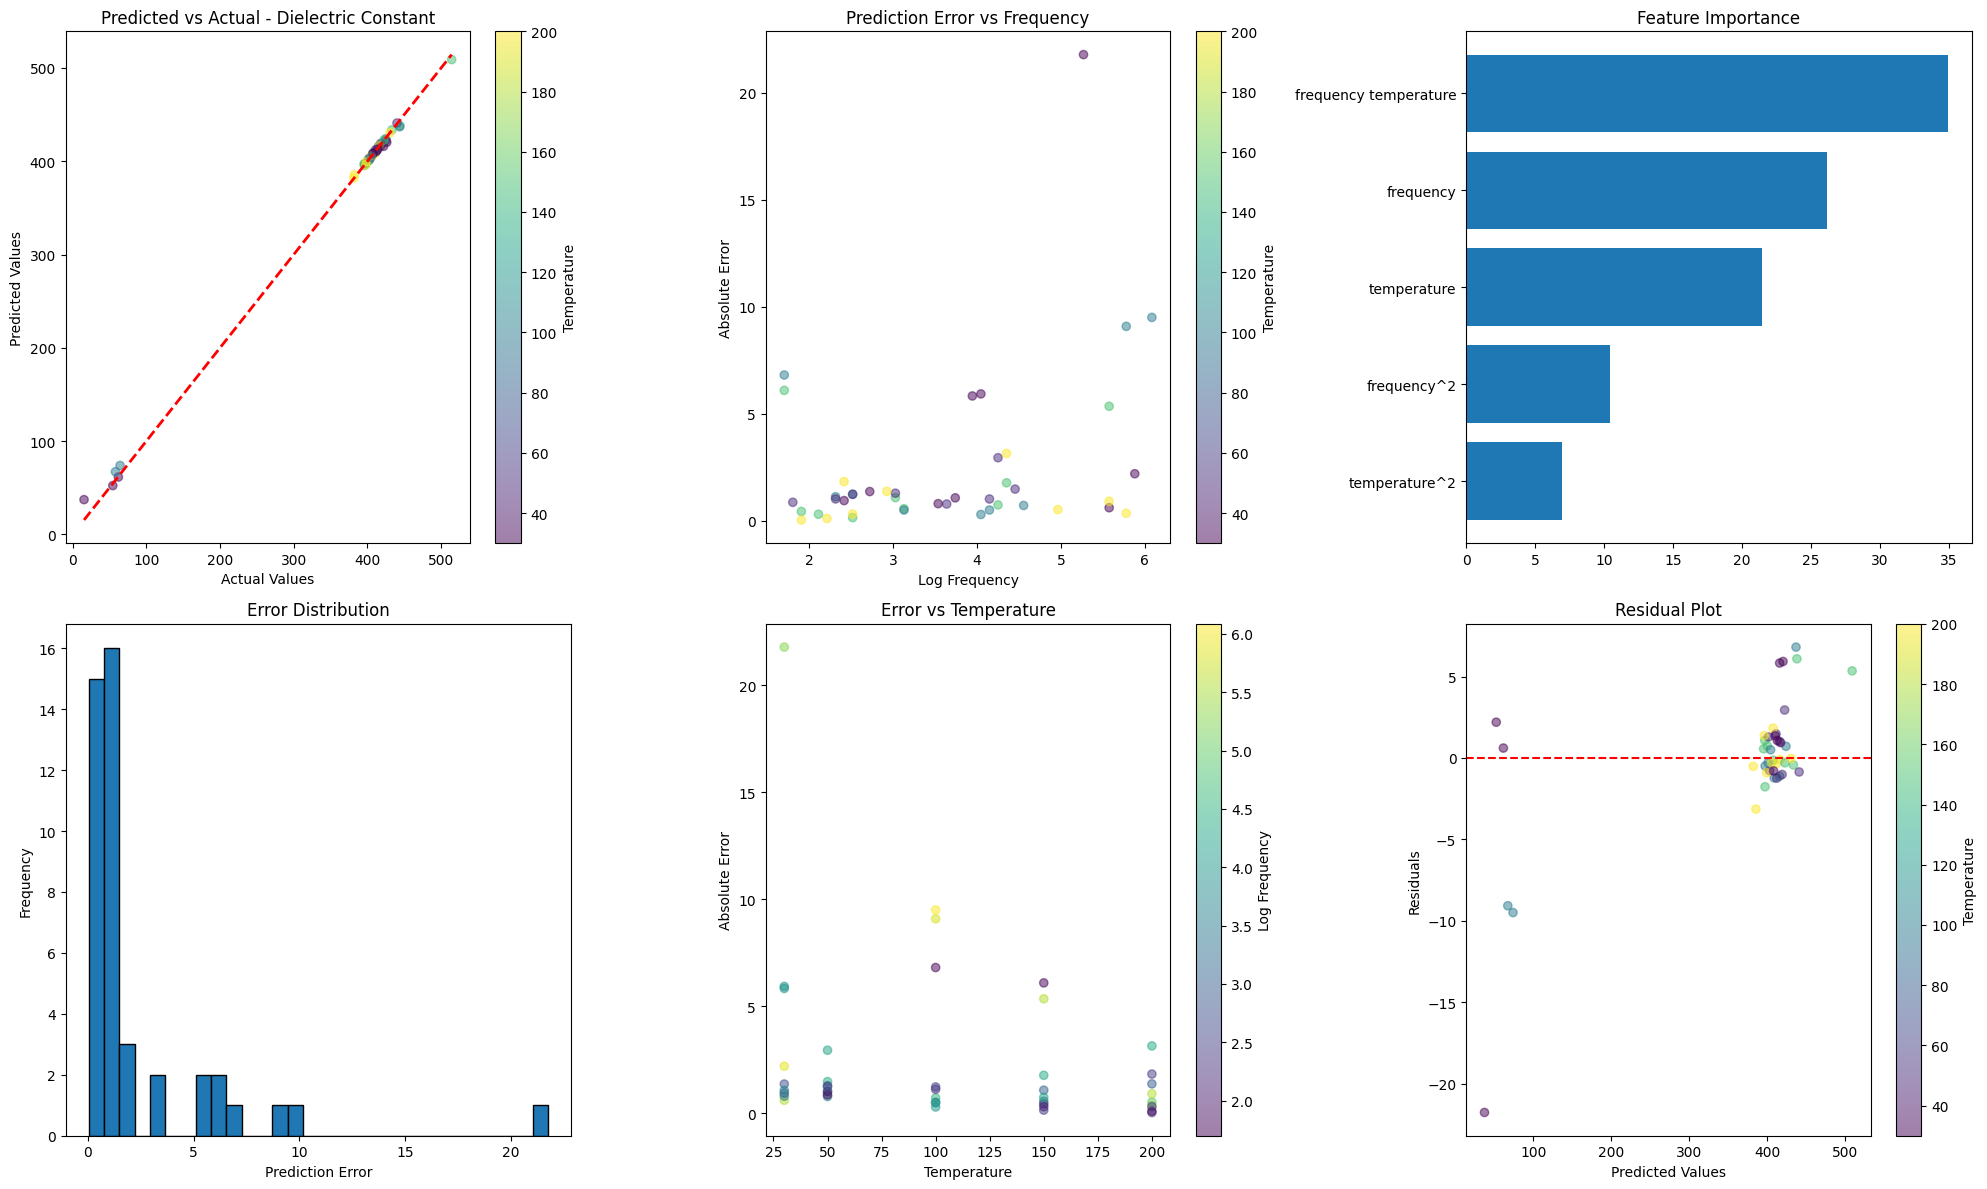

<ipython-input-13-b72ef16bc002>:154: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  }).pivot_table(


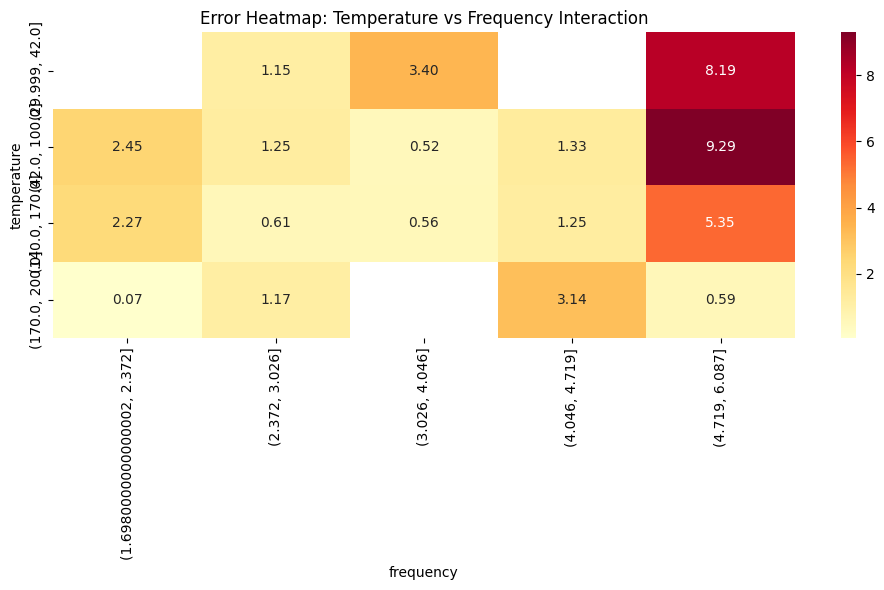

[I 2025-01-16 04:02:17,227] A new study created in memory with name: no-name-de7094e7-d7c0-447f-bdfa-9954abeeade7



Analyzing Dielectric Loss
Optimizing CatBoost parameters...


[I 2025-01-16 04:02:40,025] Trial 0 finished with value: 0.929719109059846 and parameters: {'iterations': 1998, 'learning_rate': 0.05685500768242913, 'depth': 9, 'l2_leaf_reg': 0.010000528495861364, 'min_child_samples': 23}. Best is trial 0 with value: 0.929719109059846.
[I 2025-01-16 04:05:11,449] Trial 1 finished with value: 0.9015092167945493 and parameters: {'iterations': 2384, 'learning_rate': 0.16651946895101633, 'depth': 12, 'l2_leaf_reg': 0.00022564520177119717, 'min_child_samples': 41}. Best is trial 0 with value: 0.929719109059846.
[I 2025-01-16 04:07:01,813] Trial 2 finished with value: 0.9247729804389045 and parameters: {'iterations': 1743, 'learning_rate': 0.10886404389551287, 'depth': 12, 'l2_leaf_reg': 0.00042963176432495666, 'min_child_samples': 49}. Best is trial 0 with value: 0.929719109059846.
[I 2025-01-16 04:07:18,582] Trial 3 finished with value: 0.9354474061372546 and parameters: {'iterations': 2508, 'learning_rate': 0.10790113230295371, 'depth': 8, 'l2_leaf_reg'

Training final model...
0:	learn: 2.1181230	total: 434us	remaining: 513ms
1:	learn: 1.9799519	total: 1.58ms	remaining: 934ms
2:	learn: 1.8663054	total: 2.69ms	remaining: 1.05s
3:	learn: 1.7672106	total: 3.76ms	remaining: 1.1s
4:	learn: 1.6575411	total: 4.81ms	remaining: 1.13s
5:	learn: 1.5586683	total: 5.87ms	remaining: 1.15s
6:	learn: 1.4755461	total: 6.74ms	remaining: 1.13s
7:	learn: 1.4039280	total: 7.58ms	remaining: 1.11s
8:	learn: 1.3344145	total: 8.23ms	remaining: 1.07s
9:	learn: 1.2705550	total: 9.25ms	remaining: 1.08s
10:	learn: 1.1908757	total: 10.3ms	remaining: 1.09s
11:	learn: 1.1334033	total: 11.3ms	remaining: 1.1s
12:	learn: 1.0821587	total: 12.4ms	remaining: 1.11s
13:	learn: 1.0323556	total: 13.5ms	remaining: 1.12s
14:	learn: 0.9919916	total: 14.5ms	remaining: 1.13s
15:	learn: 0.9351109	total: 15.5ms	remaining: 1.13s
16:	learn: 0.8926339	total: 16.5ms	remaining: 1.13s
17:	learn: 0.8603147	total: 17.5ms	remaining: 1.13s
18:	learn: 0.8118827	total: 18.6ms	remaining: 1.13s
1

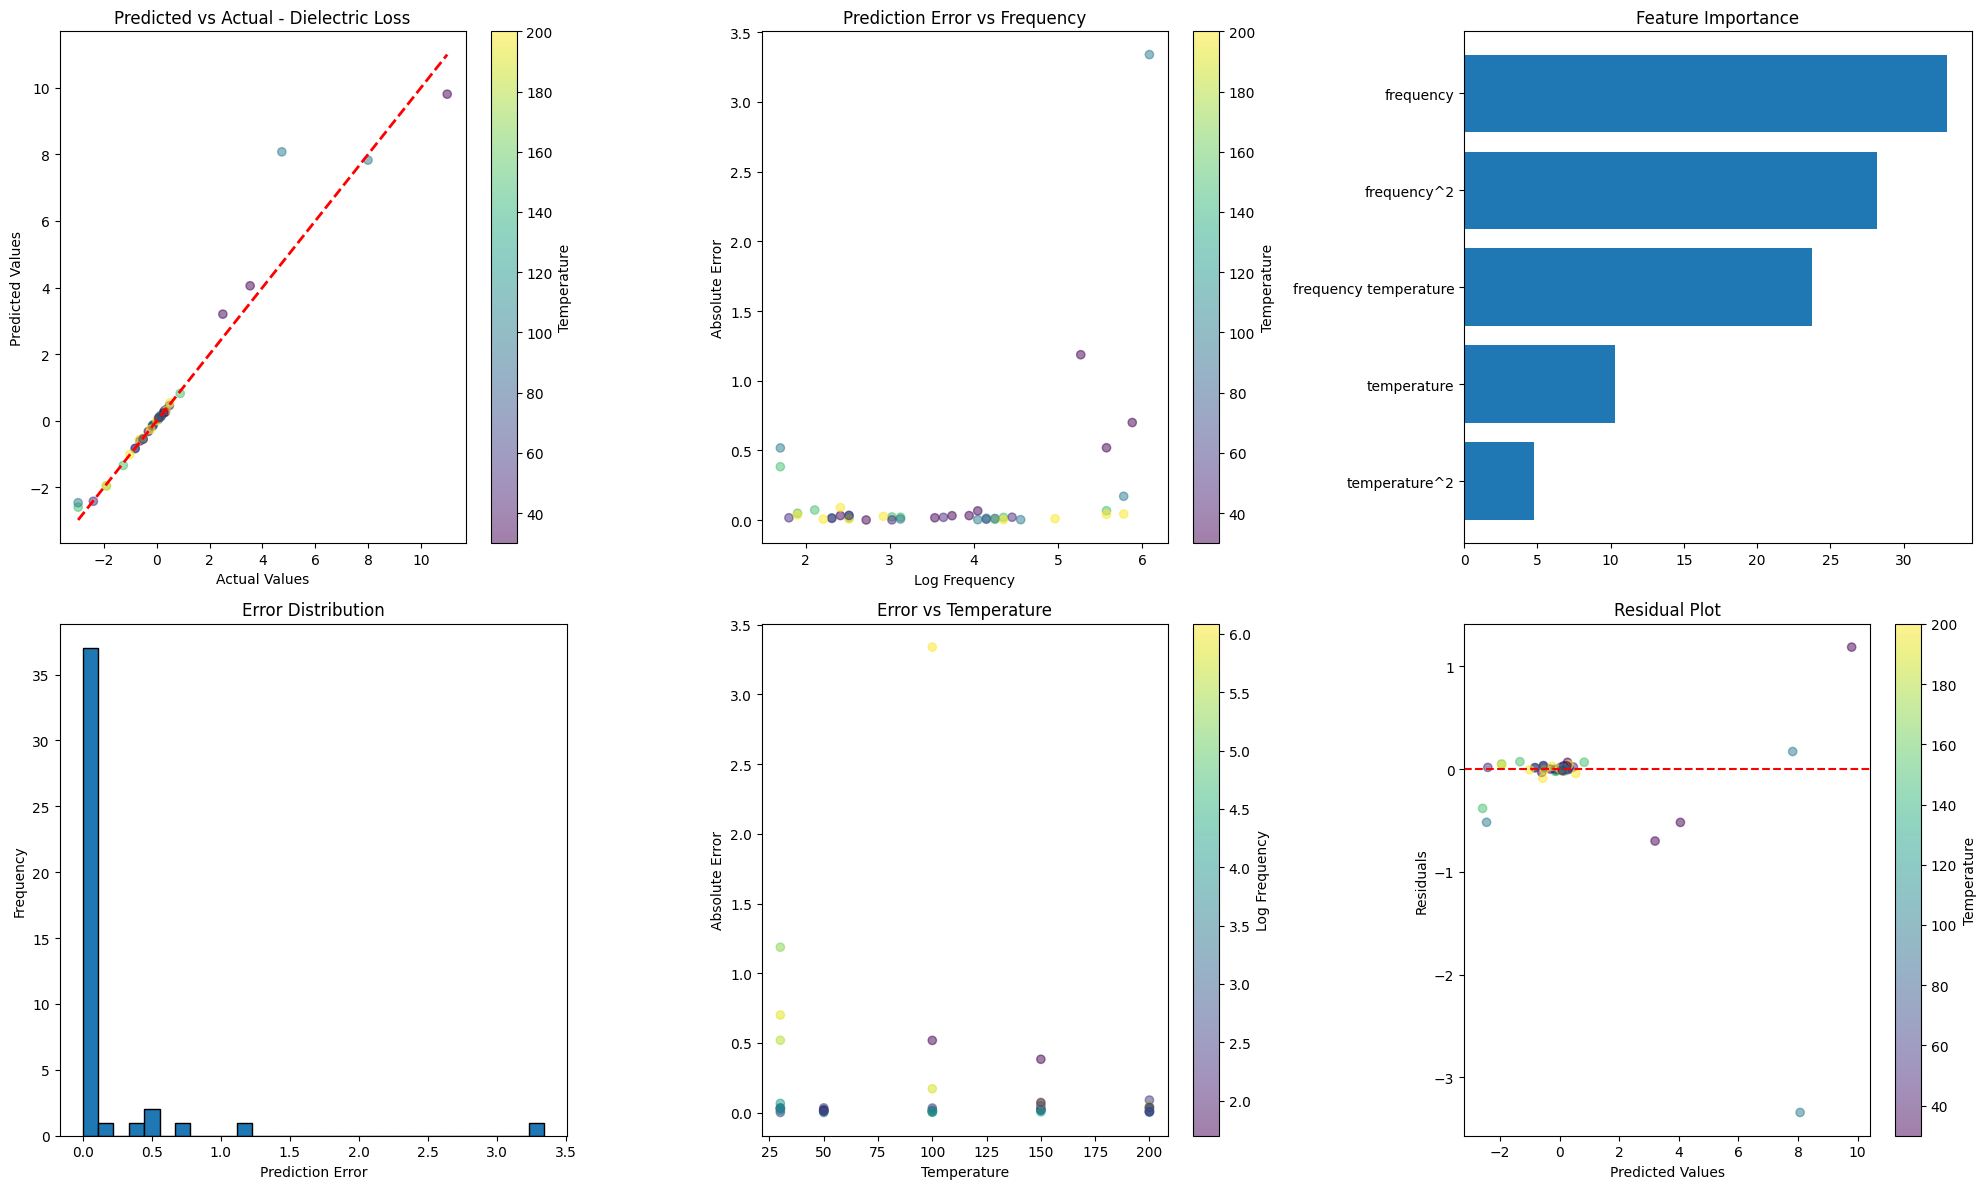

<ipython-input-13-b72ef16bc002>:154: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  }).pivot_table(


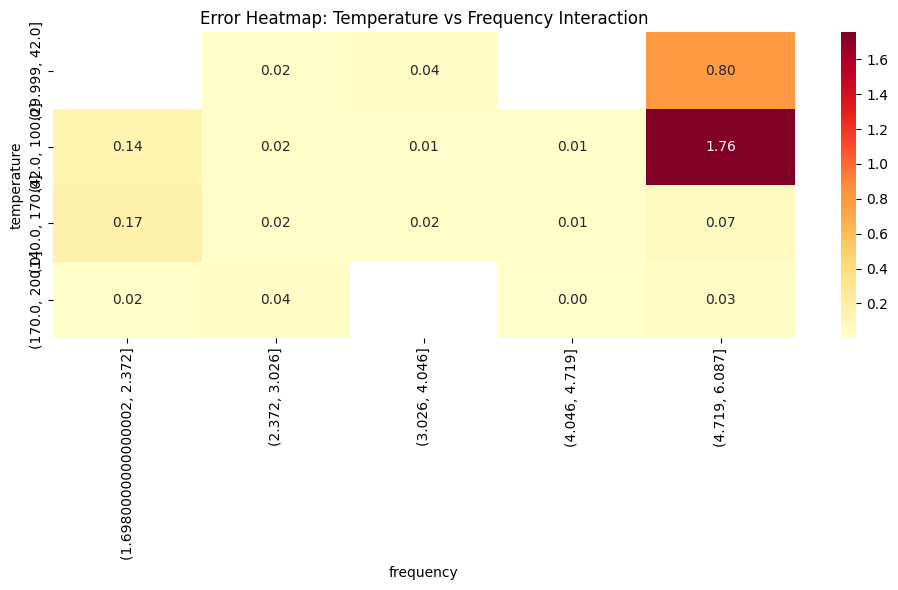

[I 2025-01-16 04:30:37,671] A new study created in memory with name: no-name-909cfdb9-b68a-4968-8171-bf6cd64c0902



Analyzing AC Conductivity
Optimizing CatBoost parameters...


[I 2025-01-16 04:30:45,276] Trial 0 finished with value: 0.800350023828343 and parameters: {'iterations': 2027, 'learning_rate': 0.1068241163783262, 'depth': 7, 'l2_leaf_reg': 4.511049706014746e-05, 'min_child_samples': 41}. Best is trial 0 with value: 0.800350023828343.
[I 2025-01-16 04:30:50,351] Trial 1 finished with value: 0.8711465024114473 and parameters: {'iterations': 2390, 'learning_rate': 0.11004713242456275, 'depth': 5, 'l2_leaf_reg': 1.9422738445559747e-05, 'min_child_samples': 22}. Best is trial 1 with value: 0.8711465024114473.
[I 2025-01-16 04:30:54,519] Trial 2 finished with value: 0.8652956281530286 and parameters: {'iterations': 2002, 'learning_rate': 0.14964281929350695, 'depth': 5, 'l2_leaf_reg': 3.0402004695071445e-06, 'min_child_samples': 38}. Best is trial 1 with value: 0.8711465024114473.
[I 2025-01-16 04:30:58,647] Trial 3 finished with value: 0.8104959458224255 and parameters: {'iterations': 1663, 'learning_rate': 0.08837232122360852, 'depth': 6, 'l2_leaf_reg'

Training final model...
0:	learn: 0.0029326	total: 431us	remaining: 976ms
1:	learn: 0.0025025	total: 1.2ms	remaining: 1.36s
2:	learn: 0.0021749	total: 1.88ms	remaining: 1.42s
3:	learn: 0.0019132	total: 2.28ms	remaining: 1.29s
4:	learn: 0.0016527	total: 2.88ms	remaining: 1.3s
5:	learn: 0.0014278	total: 3.53ms	remaining: 1.33s
6:	learn: 0.0012380	total: 4.16ms	remaining: 1.34s
7:	learn: 0.0010975	total: 4.77ms	remaining: 1.34s
8:	learn: 0.0009920	total: 5.39ms	remaining: 1.35s
9:	learn: 0.0009113	total: 6ms	remaining: 1.35s
10:	learn: 0.0008118	total: 6.61ms	remaining: 1.35s
11:	learn: 0.0007315	total: 7.21ms	remaining: 1.35s
12:	learn: 0.0006929	total: 7.82ms	remaining: 1.35s
13:	learn: 0.0006543	total: 8.47ms	remaining: 1.36s
14:	learn: 0.0006169	total: 9.08ms	remaining: 1.36s
15:	learn: 0.0005805	total: 9.67ms	remaining: 1.36s
16:	learn: 0.0005544	total: 10.3ms	remaining: 1.36s
17:	learn: 0.0005291	total: 10.9ms	remaining: 1.36s
18:	learn: 0.0005136	total: 11.5ms	remaining: 1.36s
19:	

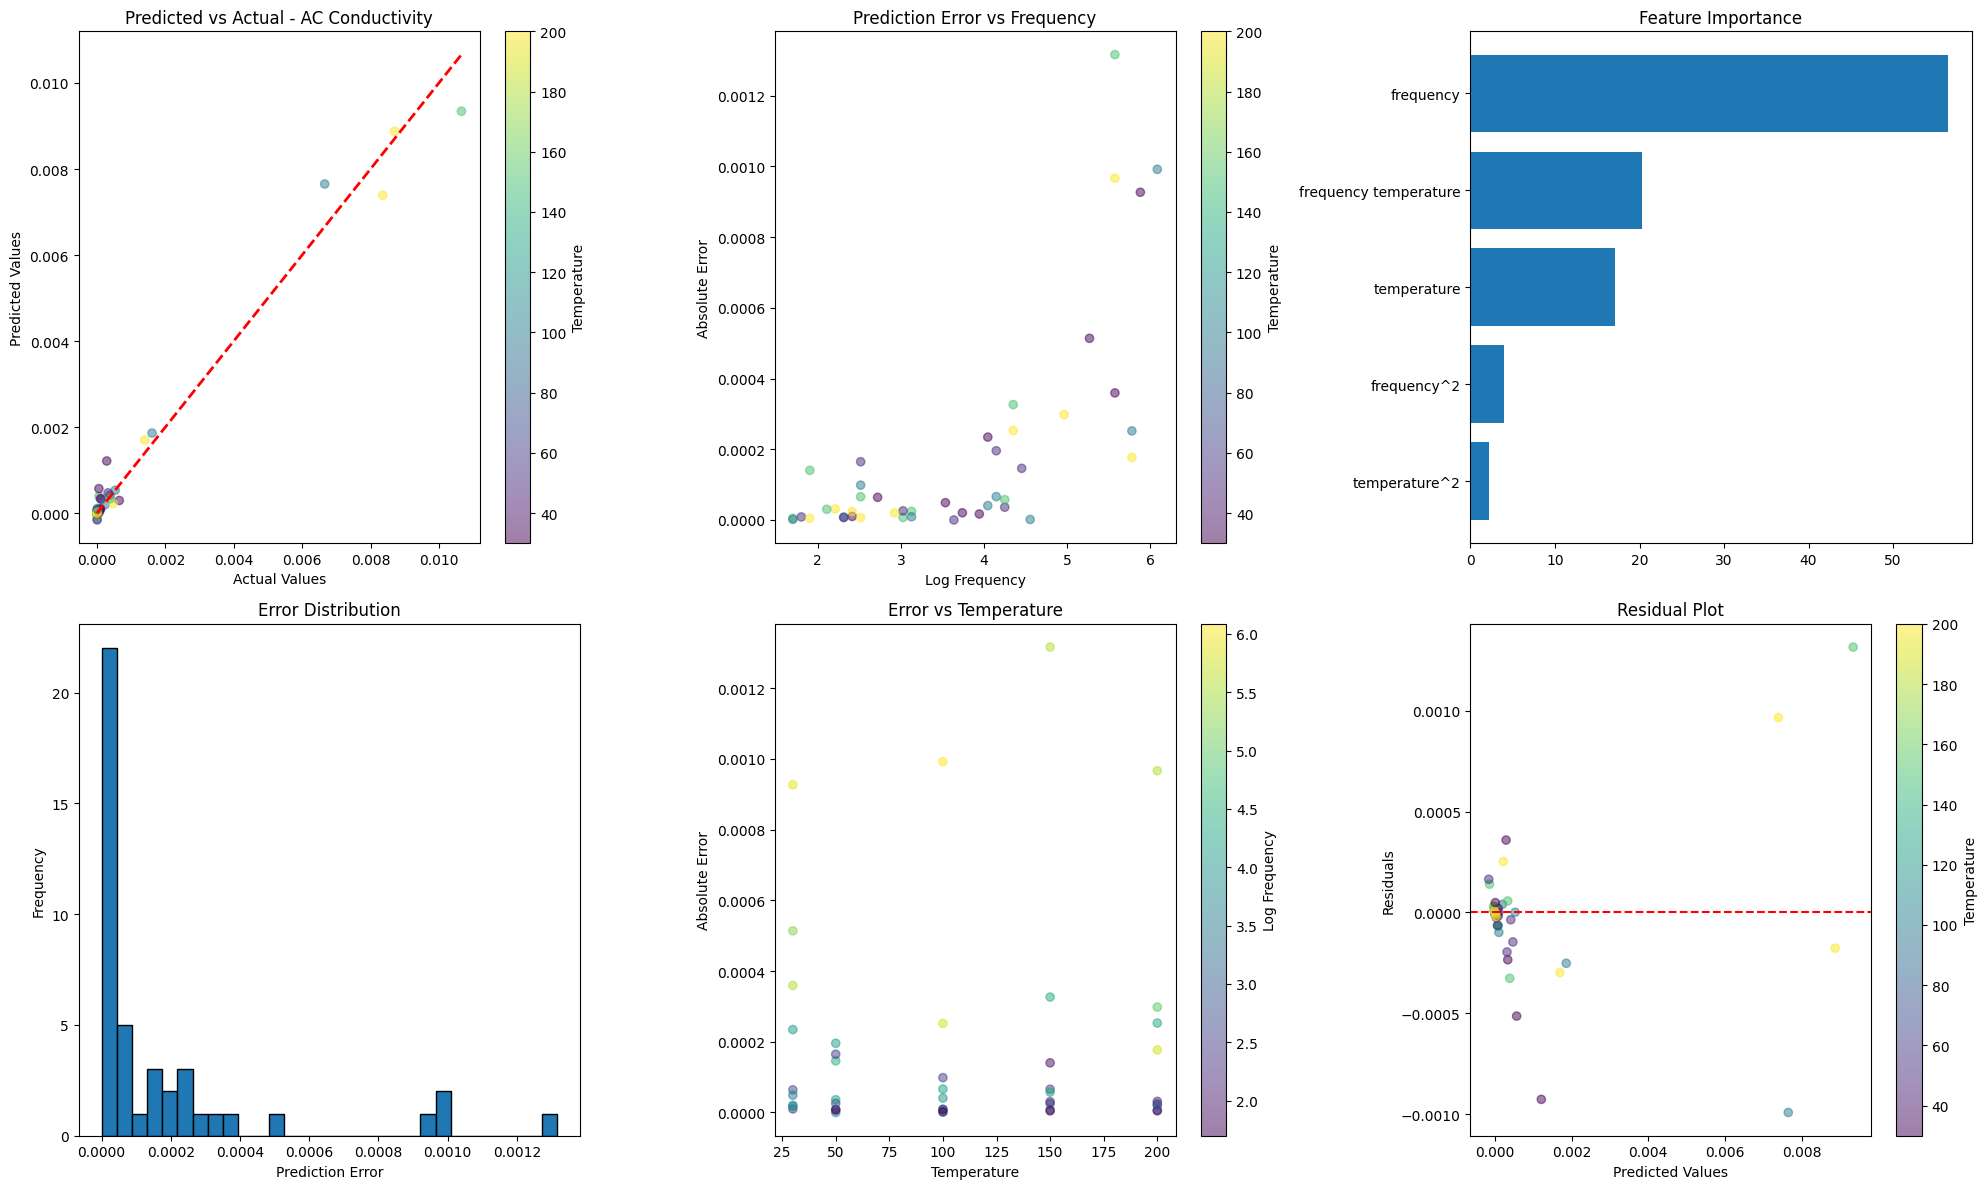

<ipython-input-13-b72ef16bc002>:154: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  }).pivot_table(


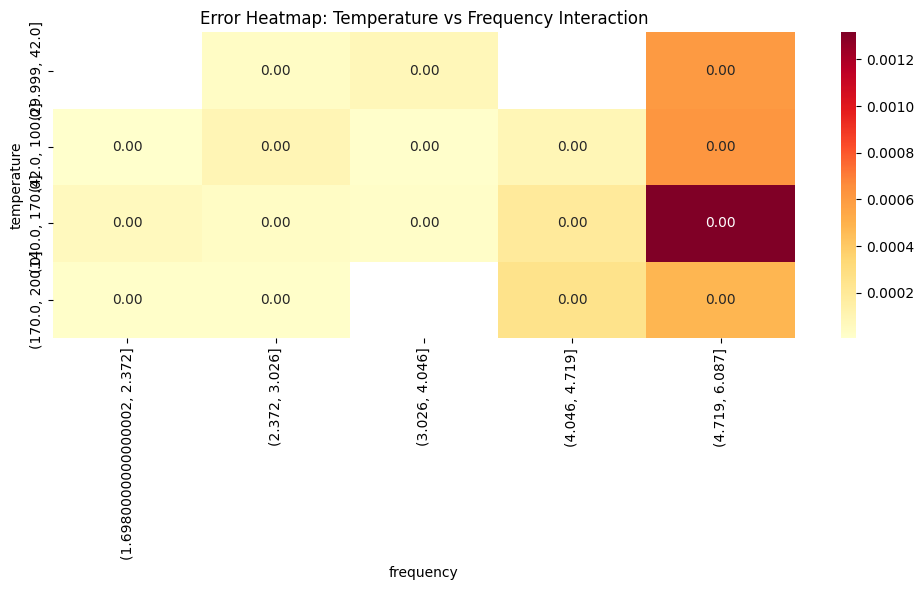

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import optuna
from sklearn.ensemble import StackingRegressor, VotingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

class AdvancedDielectricPredictor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.poly_features = PolynomialFeatures(degree=2, include_bias=False)
        self.catboost_model = None
        self.lightgbm_model = None
        self.stacking_model = None
        self.feature_importance = None
        self.feature_names = None

    def optimize_catboost(self, X, y, n_trials=100):
        def objective(trial):
            params = {
                'iterations': trial.suggest_int('iterations', 1000, 3000),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
                'depth': trial.suggest_int('depth', 4, 12),
                'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 1.0, log=True),
                'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
                'early_stopping_rounds': 100,
                'verbose': False
            }

            model = CatBoostRegressor(**params)
            scores = cross_val_score(model, X, y, cv=5, scoring='r2')
            return scores.mean()

        study = optuna.create_study(direction='maximize')
        study.optimize(objective, n_trials=n_trials)
        return study.best_params

    def fit(self, X, y):
        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        # Generate polynomial features
        X_poly = self.poly_features.fit_transform(X_scaled)
        self.feature_names = self.poly_features.get_feature_names_out(X.columns)

        print("Optimizing CatBoost parameters...")
        catboost_params = self.optimize_catboost(X_poly, y)

        # Train optimized model
        self.catboost_model = CatBoostRegressor(
            **catboost_params,
            random_seed=42
        )

        print("Training final model...")
        self.catboost_model.fit(X_poly, y)

        # Calculate feature importance
        self.feature_importance = dict(zip(self.feature_names,
                                         self.catboost_model.feature_importances_))

        return self

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        X_poly = self.poly_features.transform(X_scaled)
        return self.catboost_model.predict(X_poly)

    def evaluate(self, X, y):
        y_pred = self.predict(X)

        results = {
            'MAE': mean_absolute_error(y, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
            'R2': r2_score(y, y_pred)
        }

        return results

    def plot_predictions(self, X, y, title=''):
        y_pred = self.predict(X)

        # Create figure with subplots
        fig = plt.figure(figsize=(20, 12))
        gs = fig.add_gridspec(2, 3)

        # 1. Prediction vs Actual plot
        ax1 = fig.add_subplot(gs[0, 0])
        scatter = ax1.scatter(y, y_pred, alpha=0.5, c=X['temperature'], cmap='viridis')
        ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
        ax1.set_xlabel('Actual Values')
        ax1.set_ylabel('Predicted Values')
        ax1.set_title(f'Predicted vs Actual - {title}')
        plt.colorbar(scatter, ax=ax1, label='Temperature')

        # 2. Error vs Frequency plot
        ax2 = fig.add_subplot(gs[0, 1])
        error = np.abs(y - y_pred)
        scatter = ax2.scatter(X['frequency'], error, alpha=0.5, c=X['temperature'], cmap='viridis')
        ax2.set_xlabel('Log Frequency')
        ax2.set_ylabel('Absolute Error')
        ax2.set_title('Prediction Error vs Frequency')
        plt.colorbar(scatter, ax=ax2, label='Temperature')

        # 3. Feature Importance plot
        ax3 = fig.add_subplot(gs[0, 2])
        importance_df = pd.DataFrame({
            'Feature': list(self.feature_importance.keys()),
            'Importance': list(self.feature_importance.values())
        }).sort_values('Importance', ascending=True)

        ax3.barh(importance_df['Feature'], importance_df['Importance'])
        ax3.set_title('Feature Importance')

        # 4. Error Distribution
        ax4 = fig.add_subplot(gs[1, 0])
        ax4.hist(error, bins=30, edgecolor='black')
        ax4.set_xlabel('Prediction Error')
        ax4.set_ylabel('Frequency')
        ax4.set_title('Error Distribution')

        # 5. Error vs Temperature
        ax5 = fig.add_subplot(gs[1, 1])
        scatter = ax5.scatter(X['temperature'], error, alpha=0.5, c=X['frequency'], cmap='viridis')
        ax5.set_xlabel('Temperature')
        ax5.set_ylabel('Absolute Error')
        ax5.set_title('Error vs Temperature')
        plt.colorbar(scatter, ax=ax5, label='Log Frequency')

        # 6. Residual Plot
        ax6 = fig.add_subplot(gs[1, 2])
        residuals = y - y_pred
        scatter = ax6.scatter(y_pred, residuals, alpha=0.5, c=X['temperature'], cmap='viridis')
        ax6.axhline(y=0, color='r', linestyle='--')
        ax6.set_xlabel('Predicted Values')
        ax6.set_ylabel('Residuals')
        ax6.set_title('Residual Plot')
        plt.colorbar(scatter, ax=ax6, label='Temperature')

        plt.tight_layout()
        plt.show()

        # Additional temperature-frequency interaction plot
        plt.figure(figsize=(10, 6))
        pivot_table = pd.DataFrame({
            'Temperature': X['temperature'],
            'Frequency': X['frequency'],
            'Error': error
        }).pivot_table(
            values='Error',
            index=pd.qcut(X['temperature'], 5),
            columns=pd.qcut(X['frequency'], 5),
            aggfunc='mean'
        )

        sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlOrRd')
        plt.title('Error Heatmap: Temperature vs Frequency Interaction')
        plt.tight_layout()
        plt.show()

def prepare_data(dc_file, dl_file, ac_file):
    # Read the CSV files with numeric conversion
    df_dc = pd.read_csv(dc_file)
    df_dl = pd.read_csv(dl_file)
    df_ac = pd.read_csv(ac_file)

    data = []
    temp_columns = ['30 C', '50 C', '100 C', '150 C', '200 C']
    temperatures = [30, 50, 100, 150, 200]

    for idx in range(len(df_dc)):
        freq = df_dc.iloc[idx]['Frequency (Hz)']
        for temp, col in zip(temperatures, temp_columns):
            try:
                dc_value = pd.to_numeric(df_dc.iloc[idx][col], errors='coerce')
                dl_value = pd.to_numeric(df_dl.iloc[idx][col], errors='coerce')
                ac_value = pd.to_numeric(df_ac.iloc[idx][col], errors='coerce')

                if pd.notna(dc_value) and pd.notna(dl_value) and pd.notna(ac_value):
                    data.append({
                        'frequency': float(freq),
                        'temperature': float(temp),
                        'dielectric_constant': float(dc_value),
                        'dielectric_loss': float(dl_value),
                        'ac_conductivity': float(ac_value)
                    })
            except (KeyError, IndexError, ValueError) as e:
                print(f"Warning: Skipping data point at frequency {freq}, temperature {temp}")
                continue

    df = pd.DataFrame(data).astype({
        'frequency': 'float64',
        'temperature': 'float64',
        'dielectric_constant': 'float64',
        'dielectric_loss': 'float64',
        'ac_conductivity': 'float64'
    })

    X = df[['frequency', 'temperature']]
    y_dielectric = df['dielectric_constant']
    y_loss = df['dielectric_loss']
    y_conductivity = df['ac_conductivity']

    X = X.copy()
    X['frequency'] = np.log10(X['frequency'])

    return X, y_dielectric, y_loss, y_conductivity

def main():
    try:
        X, y_dielectric, y_loss, y_conductivity = prepare_data(
            'dielectric_constant.csv',
            'dielectric_loss.csv',
            'ac_conductivity.csv'
        )

        print("\nDataset shape:")
        print(f"Features: {X.shape}")

        properties = {
            'Dielectric Constant': y_dielectric,
            'Dielectric Loss': y_loss,
            'AC Conductivity': y_conductivity
        }

        for name, y in properties.items():
            print(f"\nAnalyzing {name}")

            # Split data with stratification
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42,
                stratify=pd.qcut(X['temperature'], q=5, duplicates='drop')
            )

            # Train model
            predictor = AdvancedDielectricPredictor()
            predictor.fit(X_train, y_train)

            # Evaluate
            train_results = predictor.evaluate(X_train, y_train)
            test_results = predictor.evaluate(X_test, y_test)

            print("\nTraining Results:")
            for metric, value in train_results.items():
                print(f"{metric}: {value:.6f}")

            print("\nTest Results:")
            for metric, value in test_results.items():
                print(f"{metric}: {value:.6f}")

            predictor.plot_predictions(X_test, y_test, name)

    except Exception as e:
        print(f"Error: {str(e)}")
        raise

if __name__ == "__main__":
    main()